# Python Kalman Filter Beispiel

Kalman filter example demo in Python

 A Python implementation of the example given in pages 11-15 of "An
 Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
 University of North Carolina at Chapel Hill, Department of Computer
 Science, TR 95-041,
 https://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf

 by Andrew D. Straw

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
n_iter = 100
sz = (n_iter,) # size of array

Q = 1e-5  # process variance
Q = Q *  np.ones(n_iter)

R = 1e-2 # estimate of measurement variance, change to see effect

x = -0.37727 * np.ones(n_iter) # Konstanter Sensorwert

#x = -0.37727 * (1.0 + np.linspace(0.0, 2, num = n_iter))  # linear veränderlicher Sensorwert

x = -0.37727 * np.ones(n_iter)
x[50::] = 1.5 * x[50::]        # Sensorwert sprungartig ändernd

z = x + np.random.normal(0,0.1,size=sz)


# Variante: Zeitvariantes Q, um Unsicherheiten im Betrieb zu berücksichtigen

# Q[50:60] = 1000 * Q[50:60]


### Kalman Filter zur Glättung der Werte

In [10]:
# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # Kalman gain

In [11]:
# initial guesses
xhat[0] = 0.0
P[0] = 1.0

In [12]:
for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1] + Q[k]

    # measurement update
    K[k] = Pminus[k] /( Pminus[k] + R )
    xhat[k] = xhatminus[k] + K[k] * (z[k] - xhatminus[k])
    P[k] = (1 - K[k]) * Pminus[k]

Betrachtung des Kalman gains

<IPython.core.display.Javascript object>


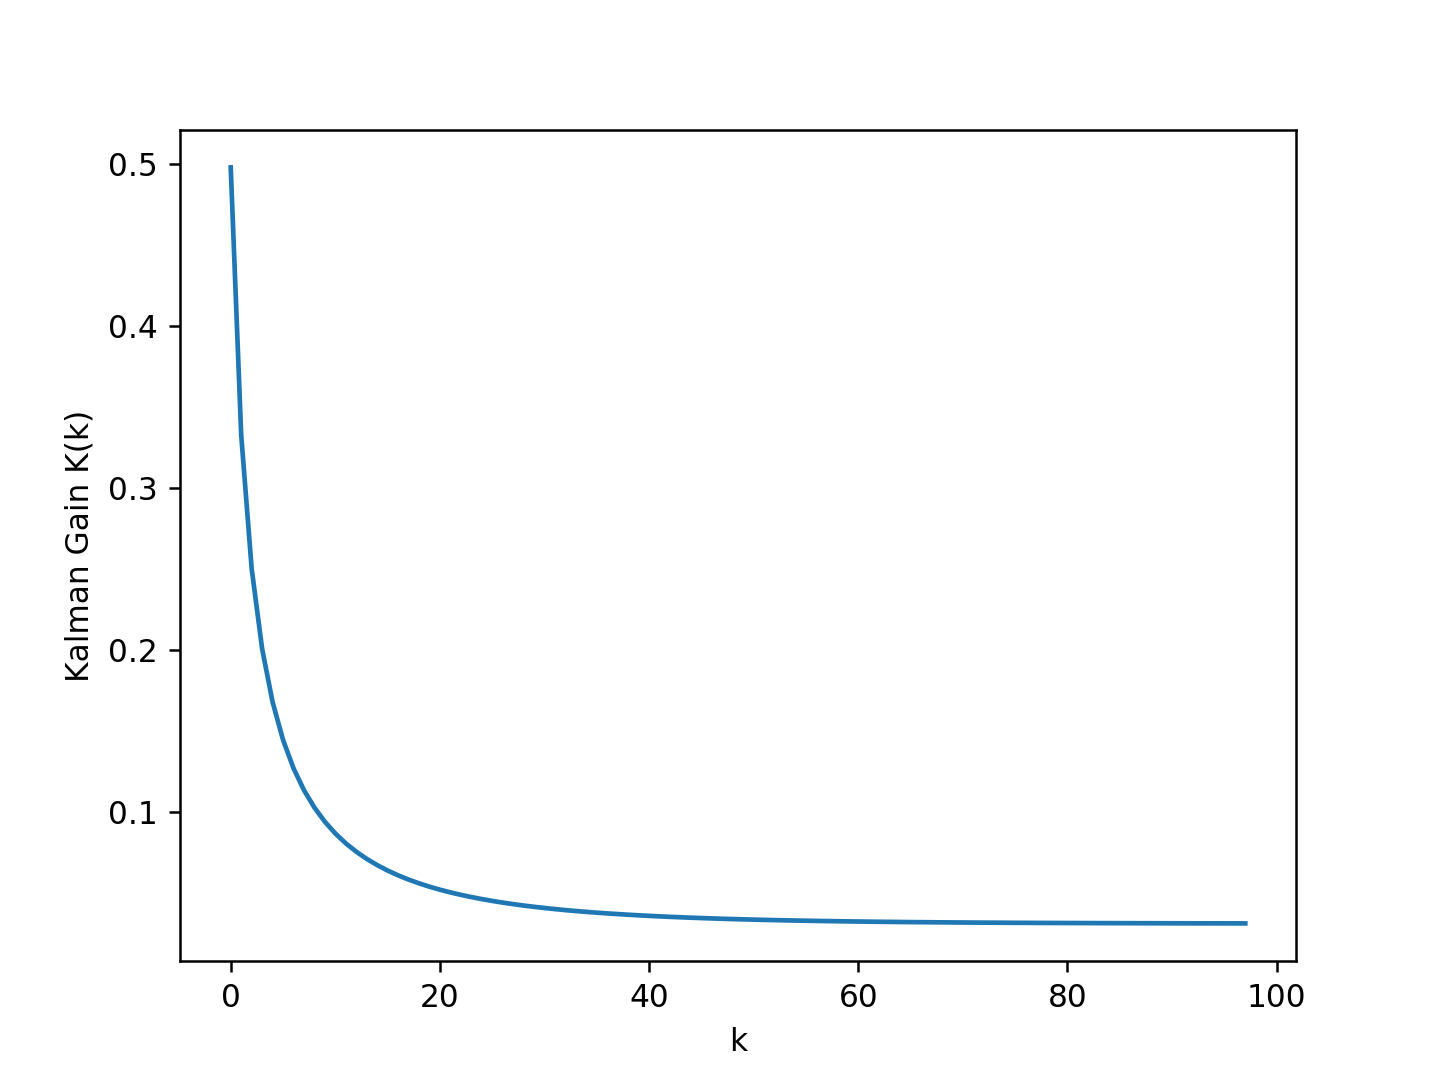

Text(0, 0.5, 'Kalman Gain K(k)')

In [13]:
plt.figure()
plt.plot(K[2::])
plt.xlabel('k')
plt.ylabel('Kalman Gain K(k)')

<IPython.core.display.Javascript object>


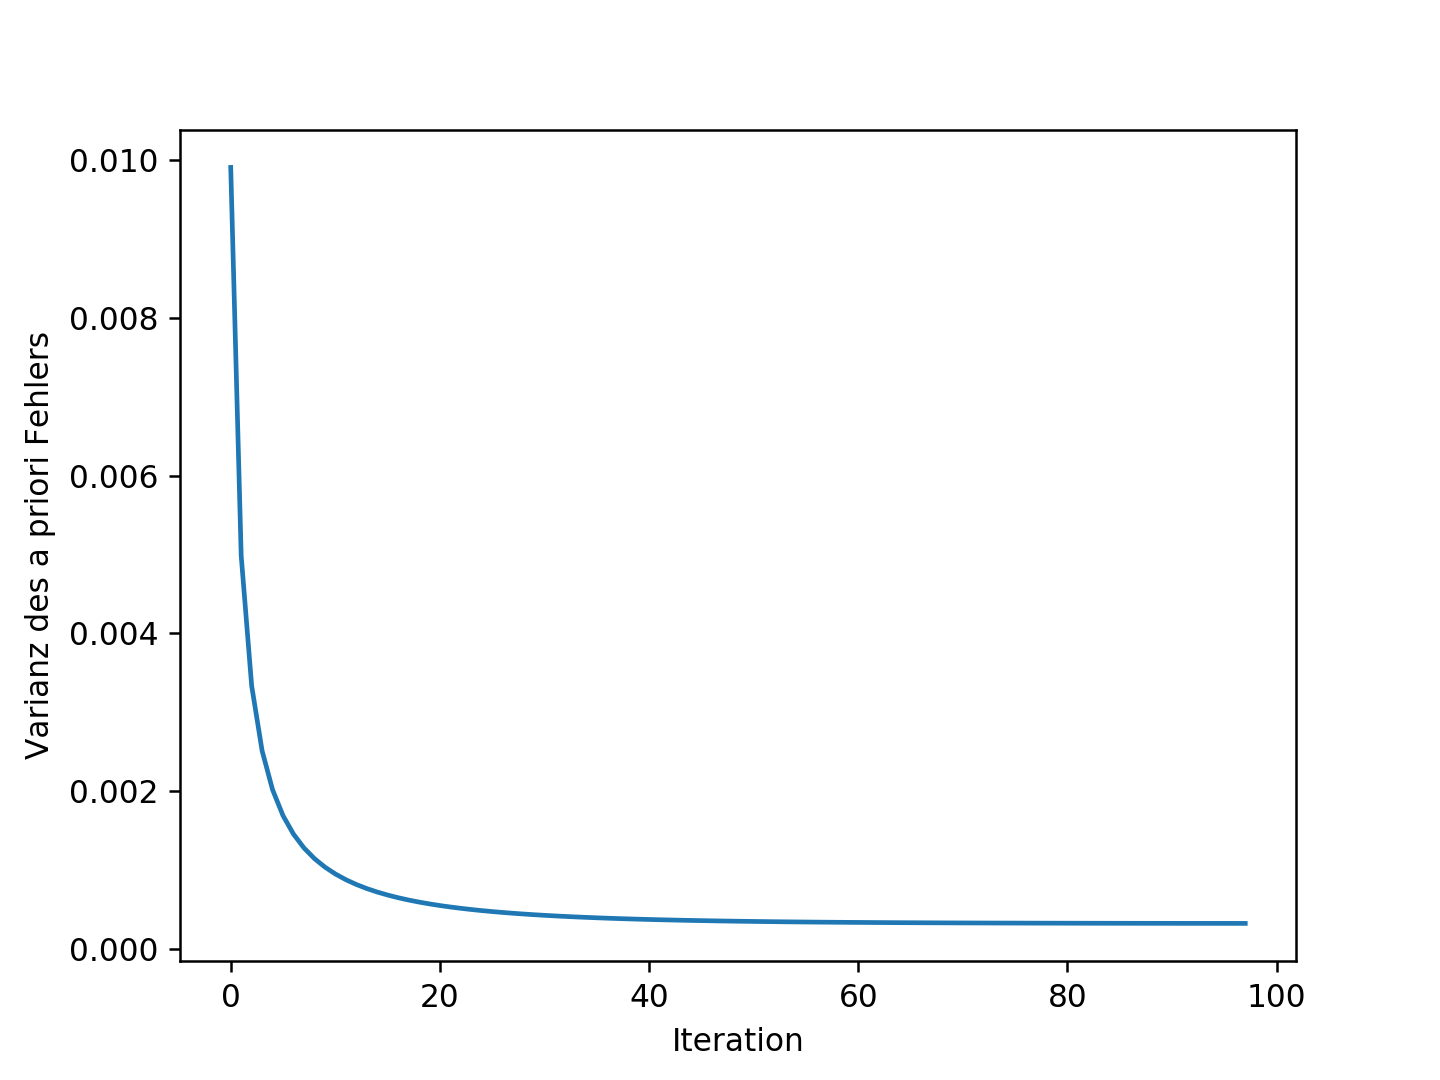

Text(0, 0.5, 'Varianz des a priori Fehlers')

In [14]:
plt.figure()
plt.plot(Pminus[2::])
plt.xlabel('Iteration')
plt.ylabel('Varianz des a priori Fehlers')

### Gleitender Mittelwert als Alternative

In [15]:
x_MA = np.zeros(sz)      # gleitender Mittelwert = MA Prozess
MA_order = 5

for k in range(MA_order,n_iter):
    x_MA[k] = np.sum(z[k-MA_order:k])/MA_order

### LMS - Adaptives Filter mit einem Koeffzienten als Alternative II

In [16]:
order = 1 # Filter mit nur einem Koeffizienten
mu = 0.1/order           # Adaptionsschrittweite

# Anlegen leerer Zeitreihen für Fehlersignal, Koeffizienten, Ausgangssignal des Filters
e = np.zeros_like(z)
w = np.zeros((order, np.size(z)))
y_hat = np.zeros_like(z)
# Startwerte für das adaptive Filter
w0 = np.zeros(order)
ym = np.zeros_like(w0)
# Eingangssignal in das adaptive Filter: u==1
u = 1.0 * np.ones(np.size(z))

In [17]:
for k, kannweg in enumerate(z):
        
        # Filter one sample at a time
        y_hat[k] = np.dot(w0, ym)
        # Form the error sequence
        e[k] = z[k] - y_hat[k]
        # Update the weight vector
        w0 = w0 + 2*mu*e[k]*ym
        w[:,k] = w0
        # Update vector used for correlation with e[k]
        ym = np.hstack((np.array(u[k]), ym[0:-1]))  

<IPython.core.display.Javascript object>


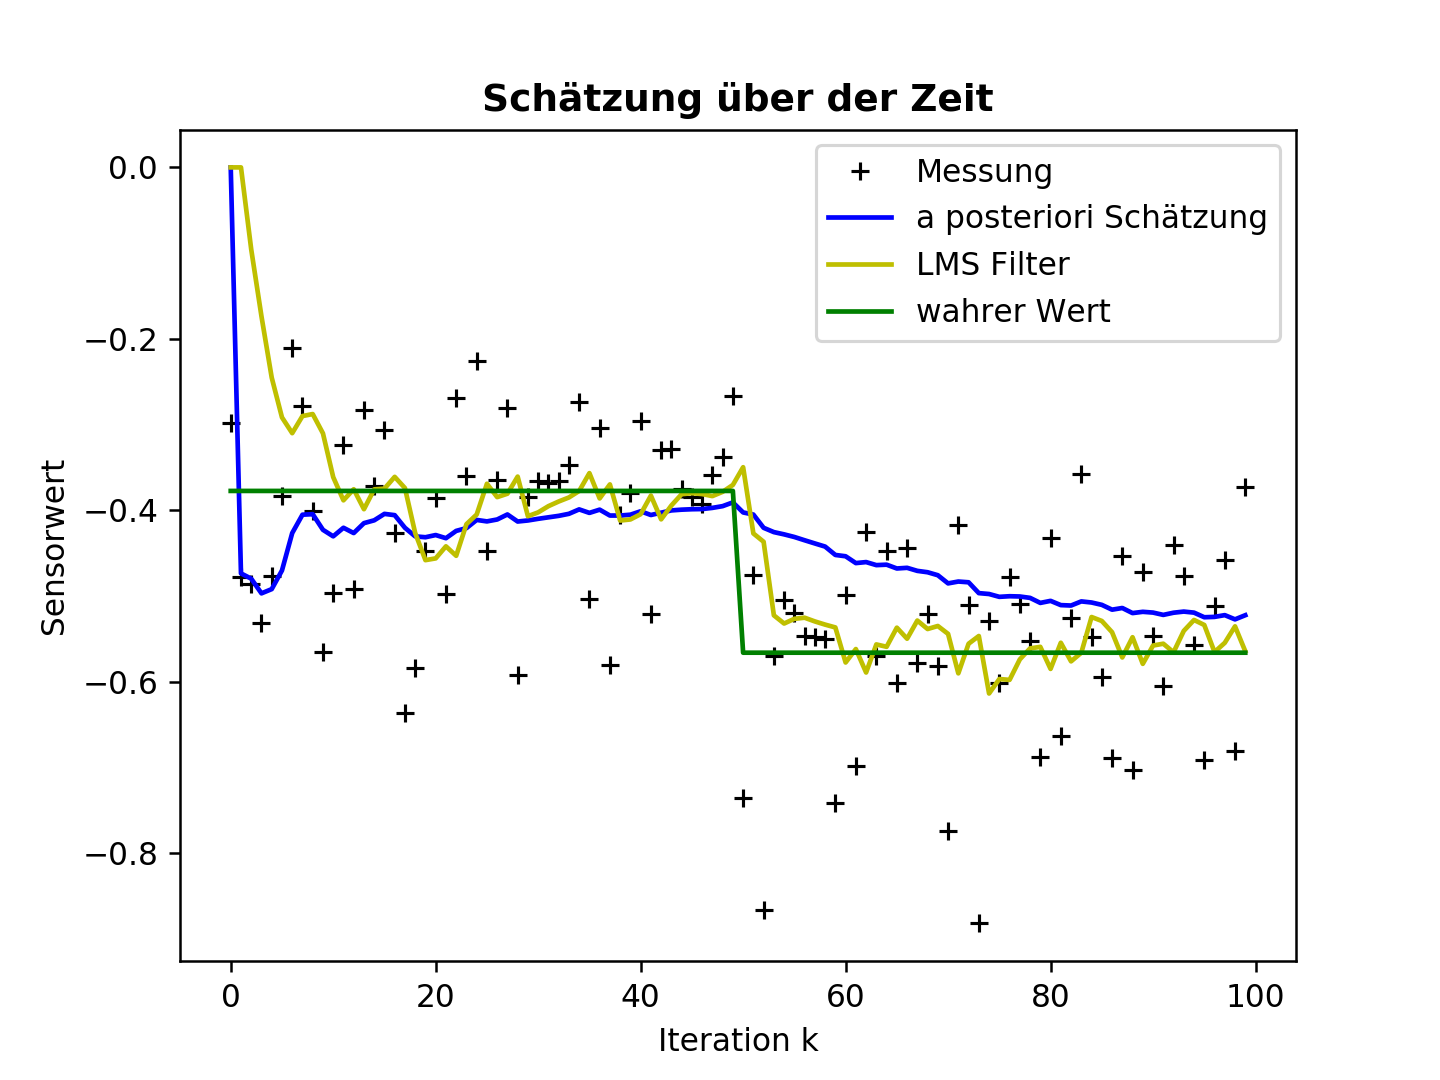

Text(0, 0.5, 'Sensorwert')

In [18]:
plt.figure()
plt.plot(z,'k+',label='Messung')
plt.plot(xhat,'b-',label='a posteriori Schätzung')
#plt.plot(x_MA,'r-',label='MA estimate')
#plt.plot(w.T,'y-',label='LMS estimate')
plt.plot(y_hat,'y-',label='LMS Filter')

plt.plot(x, color='g', label='wahrer Wert')
plt.legend()
plt.title('Schätzung über der Zeit', fontweight='bold')
plt.xlabel('Iteration k')
plt.ylabel('Sensorwert')

<IPython.core.display.Javascript object>


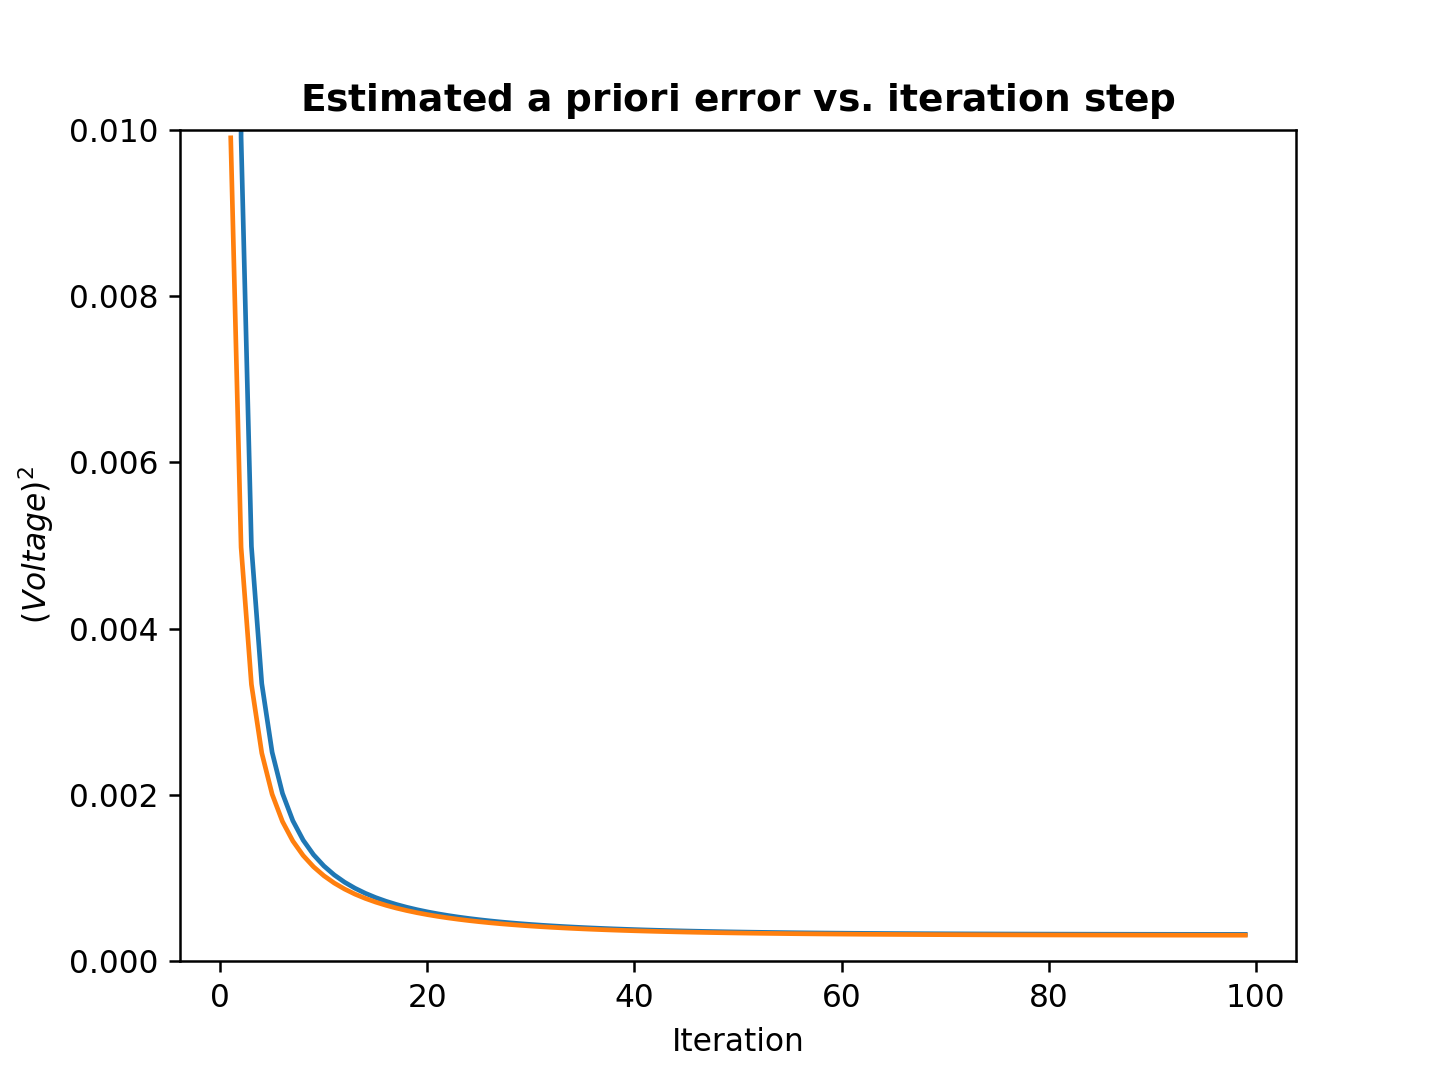

In [19]:
plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.plot(valid_iter,P[valid_iter],label='a posteri error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()